## Temperature dependent susceptibility analysis
Need to do holder correction

In [2]:
import numpy as np
import scipy as sp
import pandas as pd
from matplotlib import pyplot as plt
import math

In [78]:
DA4_r_mass = 0.188 *10**-3 #mass of rock chip in kg
DX1_4r_mass = 0.0777 *10**-3 #mass of rock chip in kg
holder_mass = 1 #dummy mass in kg

In [7]:
pwd


'C:\\Users\\murray98\\Documents\\IRM summer school\\code'

In [10]:
##Move in to same directory as the data
cd ../

SyntaxError: invalid syntax (Temp/ipykernel_3904/4147482358.py, line 2)

In [42]:
df = pd.read_excel('SSRM2022C_IRMDB_export_high_T_X_2022-06-09.xlsx', sheet_name= 'high_T susceptibility', skiprows=1)
df

,T [ºC],k [m3/kg],T [ºC].1,k [m3/kg].1,T [ºC].2,k [m3/kg].2,T [ºC].3,k [m3/kg].3
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,24.1,-1.551000e-09,26.0,-1.558000e-09,25.9,-0.000007,26.4,-0.00002
2,28.9,-1.548000e-09,30.6,-1.558000e-09,29.8,-0.000007,30.4,-0.00002
3,35.1,-1.550000e-09,36.3,-1.560000e-09,34.5,-0.000007,35.9,-0.00002
4,40.4,-1.548000e-09,42.3,-1.559000e-09,39.4,-0.000007,42.0,-0.00002
...,...,...,...,...,...,...,...,...
434,NaN,NaN,53.2,-1.556000e-09,NaN,NaN,54.7,-0.00002
435,NaN,NaN,51.4,-1.559000e-09,NaN,NaN,53.2,-0.00002
436,NaN,NaN,49.8,-1.557000e-09,NaN,NaN,51.7,-0.00002
437,NaN,NaN,NaN,NaN,NaN,NaN,50.3,-0.00002


In [36]:
##df = pd.read_csv('SSRM2022C_IRMDB_export_high_T_X_2022-06-09.csv', 
##                 sep=",", 
##                 skiprows=1)
##print(df)

In [60]:
holder_data = df.iloc[0 :, 2:4]
holder_data = holder_data.rename(columns={"T [ºC].1": "T [ºC]", "k [m3/kg].1": "k [m3/kg]"})
holder_data

,T [ºC],k [m3/kg]
0,NaN,NaN
1,26.0,-1.558000e-09
2,30.6,-1.558000e-09
3,36.3,-1.560000e-09
4,42.3,-1.559000e-09
...,...,...
434,53.2,-1.556000e-09
435,51.4,-1.559000e-09
436,49.8,-1.557000e-09
437,NaN,NaN


In [79]:
holder_data['dk'] = holder_data['k [m3/kg]'].diff()
holder_data['k [m3]'] = holder_data['k [m3/kg]']*holder_mass
holder_data

,T [ºC],k [m3/kg],dk,k [m3]
0,NaN,NaN,NaN,NaN
1,26.0,-1.558000e-09,NaN,-1.558000e-09
2,30.6,-1.558000e-09,0.000000e+00,-1.558000e-09
3,36.3,-1.560000e-09,-2.000000e-12,-1.560000e-09
4,42.3,-1.559000e-09,1.000000e-12,-1.559000e-09
...,...,...,...,...
434,53.2,-1.556000e-09,3.000000e-12,-1.556000e-09
435,51.4,-1.559000e-09,-3.000000e-12,-1.559000e-09
436,49.8,-1.557000e-09,2.000000e-12,-1.557000e-09
437,NaN,NaN,NaN,NaN


In [80]:
DA4_r_data = df.iloc[0 :, 4:6]
DA4_r_data = DA4_r_data.rename(columns={"T [ºC].2": "T [ºC]", "k [m3/kg].2": "k [m3/kg]"})
DA4_r_data['dk'] = DA4_r_data['k [m3/kg]'].diff()
DA4_r_data['k [m3]'] = DA4_r_data['k [m3/kg]']*DA4_r_mass
DA4_r_data

,T [ºC],k [m3/kg],dk,k [m3]
0,NaN,NaN,NaN,NaN
1,25.9,-0.000007,NaN,-1.378000e-09
2,29.8,-0.000007,-1.063830e-08,-1.380000e-09
3,34.5,-0.000007,-1.063830e-08,-1.382000e-09
4,39.4,-0.000007,-5.319149e-09,-1.383000e-09
...,...,...,...,...
434,NaN,NaN,NaN,NaN
435,NaN,NaN,NaN,NaN
436,NaN,NaN,NaN,NaN
437,NaN,NaN,NaN,NaN


In [81]:
DX1_4r_data = df.iloc[0 :, 6:8]
DX1_4r_data = DX1_4r_data.rename(columns={"T [ºC].3": "T [ºC]", "k [m3/kg].3": "k [m3/kg]"})
DX1_4r_data['dk'] = DX1_4r_data['k [m3/kg]'].diff()
DX1_4r_data['k [m3]'] = DX1_4r_data['k [m3/kg]']*DX1_4r_mass
DX1_4r_data

,T [ºC],k [m3/kg],dk,k [m3]
0,NaN,NaN,NaN,NaN
1,26.4,-0.00002,NaN,-1.563000e-09
2,30.4,-0.00002,2.574003e-08,-1.561000e-09
3,35.9,-0.00002,-2.574003e-08,-1.563000e-09
4,42.0,-0.00002,2.574003e-08,-1.561000e-09
...,...,...,...,...
434,54.7,-0.00002,0.000000e+00,-1.560000e-09
435,53.2,-0.00002,0.000000e+00,-1.560000e-09
436,51.7,-0.00002,0.000000e+00,-1.560000e-09
437,50.3,-0.00002,0.000000e+00,-1.560000e-09


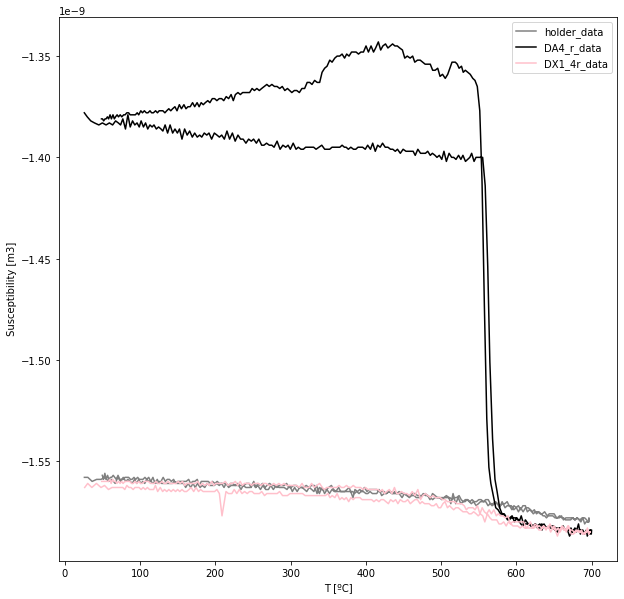

In [84]:
fig,ax = plt.subplots(figsize=(10,10))


ax.plot(holder_data["T [ºC]"] , holder_data['k [m3]'], label = 'holder_data', color = 'grey')
ax.plot(DA4_r_data["T [ºC]"] , DA4_r_data['k [m3]'], label = 'DA4_r_data', color = 'black')
ax.plot(DX1_4r_data["T [ºC]"] , DX1_4r_data['k [m3]'], label = 'DX1_4r_data', color = 'pink')


ax.set_xlabel('T [ºC]')
ax.set_ylabel(' Susceptibility [m3]')

ax.legend()

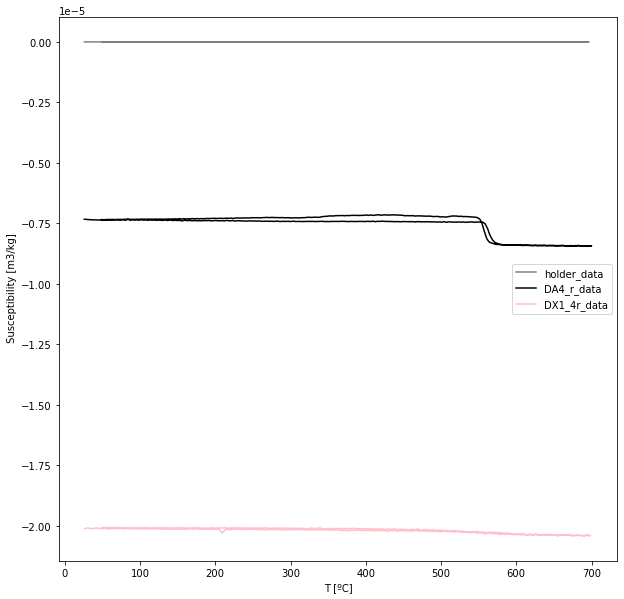

In [85]:
fig,ax = plt.subplots(figsize=(10,10))


ax.plot(holder_data["T [ºC]"] , holder_data['k [m3/kg]'], label = 'holder_data', color = 'grey')
ax.plot(DA4_r_data["T [ºC]"] , DA4_r_data['k [m3/kg]'], label = 'DA4_r_data', color = 'black')
ax.plot(DX1_4r_data["T [ºC]"] , DX1_4r_data['k [m3/kg]'], label = 'DX1_4r_data', color = 'pink')


ax.set_xlabel('T [ºC]')
ax.set_ylabel(' Susceptibility [m3/kg]')

ax.legend()

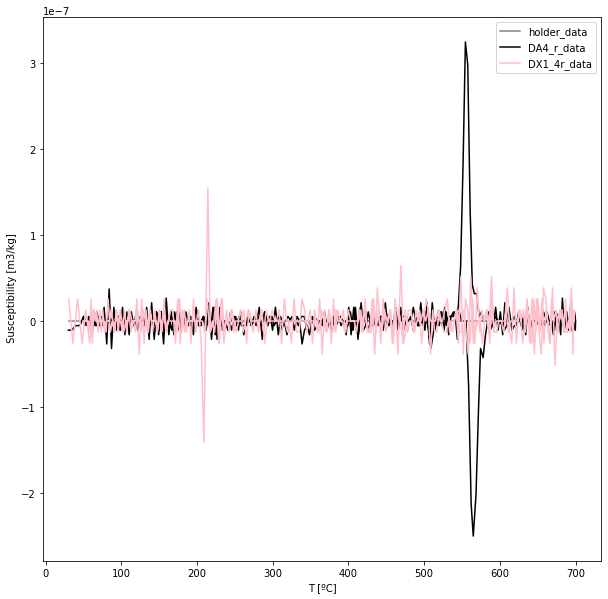

In [86]:
fig,ax = plt.subplots(figsize=(10,10))


ax.plot(holder_data["T [ºC]"] , holder_data['dk'], label = 'holder_data', color = 'grey')
ax.plot(DA4_r_data["T [ºC]"] , DA4_r_data['dk'], label = 'DA4_r_data', color = 'black')
ax.plot(DX1_4r_data["T [ºC]"] , DX1_4r_data['dk'], label = 'DX1_4r_data', color = 'pink')


ax.set_xlabel('T [ºC]')
ax.set_ylabel(' Susceptibility [m3/kg]')

ax.legend()

<AxesSubplot:xlabel='T [ºC]', ylabel='k [m3/kg]'>

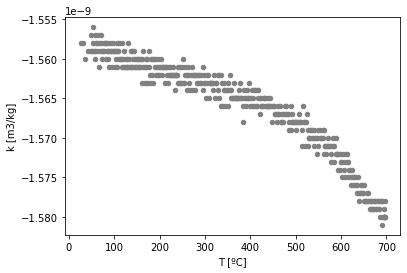

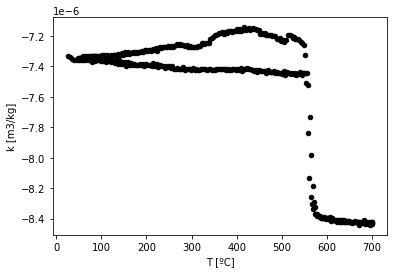

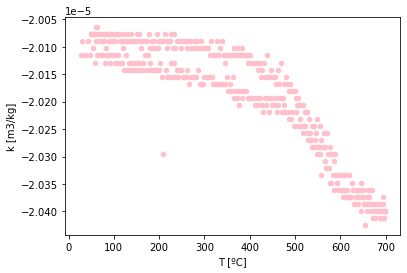

In [87]:
holder_data.plot.scatter(x="T [ºC]", y='k [m3/kg]', color = 'grey')
DA4_r_data.plot.scatter(x="T [ºC]", y='k [m3/kg]', color = 'black')
DX1_4r_data.plot.scatter(x="T [ºC]", y='k [m3/kg]', color = 'pink')